In [2]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import os
import numpy as np
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt

import re

In [5]:
config_file = '../configs/HRSID/faster_rcnn_sta_r50_fpn_1x.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../sar_work_dirs/HRSID/faster_rcnn_sta_r50_fpn_1x(scale=4,bs=2)/epoch_21.pth'
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [215]:
img = 'P0083_0_800_3000_3800.png'

In [216]:
#mmcv.imshow(img)

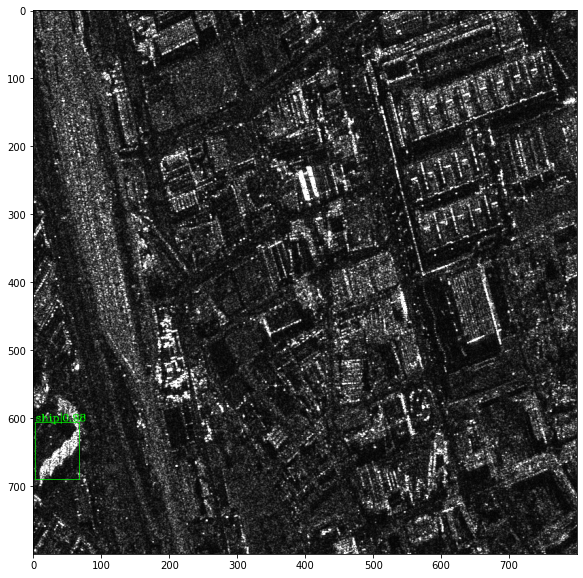

In [217]:
result, x_backbone, x_fpn = inference_detector(model, img)
# show the results
show_result_pyplot(img, result, model.CLASSES, score_thr=0.6)

In [218]:
type(x_backbone[0])

torch.Tensor

In [219]:
fm = []
for i in range(len(x_backbone)):
    print(x_backbone[i].squeeze().shape)
    fm.append(x_backbone[i].cpu().data.numpy().squeeze())

torch.Size([256, 104, 104])
torch.Size([512, 52, 52])
torch.Size([1024, 26, 26])
torch.Size([2048, 13, 13])


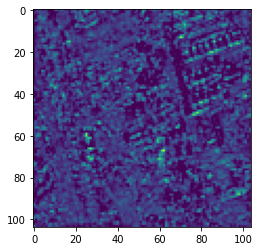

In [220]:
import matplotlib.pyplot as plt
plt.imshow(fm[0][124])

In [221]:
def gen_cam(image, mask):
    """
    生成CAM图
    :param image: [H,W,C],原始图像
    :param mask: [H,W],范围0~1
    :return: tuple(cam,heatmap)
    """
    # mask转为heatmap
    H ,W = image.shape[0], image.shape[1]
    mask = cv2.resize(mask, (W, H))
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    print(heatmap.shape)
    heatmap = heatmap[..., ::-1]  # gbr to rgb

    # 合并heatmap到原始图像
    cam = heatmap  + np.float32(image)
    
    return norm_image(cam), heatmap

def norm_image(image):
    """
    标准化图像
    :param image: [H,W,C]
    :return:
    """
    image = image.copy()
    image -= np.max(np.min(image), 0)
    image /= np.max(image)
    image *= 255.
    return np.uint8(image)

def visualise_feature(x, imagepath=img):
    '''
    visualise every channels and save in a path
    visualise total-sum feature map and save it
    visualise feature map using heat map and cover it on original image
    
    x : a tuple ; 4 stages feature map length=5
    savepath: filename is image's name
    '''
    image = mmcv.imread(imagepath)
    savepath = re.split('[/.]', imagepath.strip())[0]
    os.makedirs(savepath)
    for i in range(len(x)):
        feature = x[i].cpu().data.numpy().squeeze()
        print(feature.shape)
        sum_fm = np.maximum(feature, 0)
        sum_fm = np.mean(sum_fm, axis=0)
        #sum_fm = np.mean(feature, axis=0)
        #sum_fm = np.maximum(sum_fm, 0)
        #sum_fm1 = (sum_fm - np.min(sum_fm)) / (np.max(sum_fm) - np.min(sum_fm) + 0.00001)
        #sum_fm = np.maximum(sum_fm, 0)
        sum_fm = sum_fm / np.max(sum_fm)
        print(sum_fm.shape)
        img = image / 225 
        
        
        cover_im , heat_map = gen_cam(img, sum_fm)
        
        plt.imsave('./{}/cover_im_{}_stage.jpg'.format(savepath, i), cover_im)
        plt.imsave('./{}/heat_map_{}_stage.jpg'.format(savepath, i), heat_map)
        plt.imsave('./{}/sum_feature_{}_stage.jpg'.format(savepath, i), sum_fm)
        

In [222]:
visualise_feature(x_backbone, img)

(256, 104, 104)
(104, 104)
(800, 800, 3)
(512, 52, 52)
(52, 52)
(800, 800, 3)
(1024, 26, 26)
(26, 26)
(800, 800, 3)
(2048, 13, 13)
(13, 13)
(800, 800, 3)


In [211]:
config_file = '../configs/SSDD/faster_rcnn_r50_fpn_1x.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../sar_work_dirs/SSDD/416x416/faster_rcnn_r50_fpn_1x_baseline(scale=4 bs=2+2GPUs)/latest.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

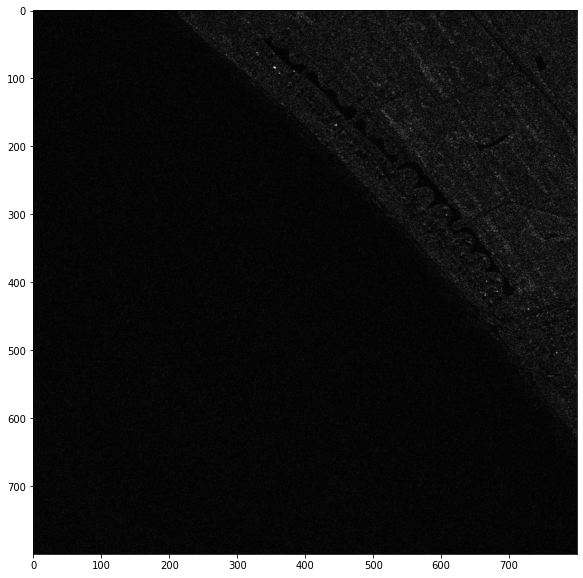

In [212]:
result, x_backbone, x_fpn = inference_detector(model, img)
# show the results
show_result_pyplot(img, result, model.CLASSES, score_thr=0.6)

In [213]:
visualise_feature(x_backbone, img)

(256, 104, 104)
(104, 104)
(800, 800, 3)
(512, 52, 52)
(52, 52)
(800, 800, 3)
(1024, 26, 26)
(26, 26)
(800, 800, 3)
(2048, 13, 13)
(13, 13)
(800, 800, 3)


In [214]:
fm = []
for i in range(len(x)):
    print(x[i].squeeze().shape)
    fm.append(x[i].cpu().data.numpy().squeeze())

NameError: name 'x' is not defined

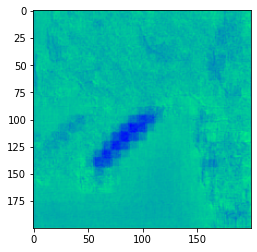

In [260]:
plt.imshow(fm[0][45], cmap=plt.cm.winter)

In [9]:
import numpy as np
a=np.loadtxt('thresholding')

In [10]:
a.shape

(15104,)